In [21]:
from google.colab import files
import pandas as pd

df = files.upload()
data = pd.read_csv('amazon_sales_dataset.csv')

Saving amazon_sales_dataset.csv to amazon_sales_dataset (1).csv


**EDA (Exploratory Data Analysis)**

In [22]:
data.describe()

,order_id,product_id,price,discount_percent,quantity_sold,rating,review_count,discounted_price,total_revenue
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2986.848740,252.507260,13.340700,2.999400,2.996316,249.329280,218.886566,657.331475
std,14433.901067,1156.374535,143.025544,9.850694,1.415401,1.154295,144.251981,127.317681,526.223968
min,1.000000,1000.000000,5.010000,0.000000,1.000000,1.000000,0.000000,3.530000,3.840000
25%,12500.750000,1983.000000,127.840000,5.000000,2.000000,2.000000,125.000000,109.680000,240.320000
50%,25000.500000,2983.000000,252.970000,10.000000,3.000000,3.000000,250.000000,215.805000,505.410000
75%,37500.250000,3989.000000,376.335000,20.000000,4.000000,4.000000,374.000000,322.702500,968.970000
max,50000.000000,4999.000000,499.990000,30.000000,5.000000,5.000000,499.000000,499.910000,2499.550000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  int64  
 1   order_date        50000 non-null  object 
 2   product_id        50000 non-null  int64  
 3   product_category  50000 non-null  object 
 4   price             50000 non-null  float64
 5   discount_percent  50000 non-null  int64  
 6   quantity_sold     50000 non-null  int64  
 7   customer_region   50000 non-null  object 
 8   payment_method    50000 non-null  object 
 9   rating            50000 non-null  float64
 10  review_count      50000 non-null  int64  
 11  discounted_price  50000 non-null  float64
 12  total_revenue     50000 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 5.0+ MB


In [24]:
data.head(100)

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2022-02-10,2964,Beauty,61.33,15,3,Middle East,Credit Card,4.1,418,52.13,156.39
96,97,2022-06-06,2172,Home & Kitchen,299.14,30,5,Europe,Credit Card,1.9,223,209.40,1047.00
97,98,2022-01-15,3039,Sports,396.42,10,3,North America,UPI,2.2,213,356.78,1070.34
98,99,2022-03-06,1092,Sports,66.83,30,3,Middle East,Debit Card,4.6,54,46.78,140.34


In [25]:
data.shape

(50000, 13)

**Data Cleaning**

In [26]:
Missing_Values = data.isnull().sum()
Unique_Values = data.nunique()

print("Missing Values In This Data:\n", Missing_Values)
print("------------------------------")
print("Unique Values In This Data:\n", Unique_Values)

Missing Values In This Data:
 order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64
------------------------------
Unique Values In This Data:
 order_id            50000
order_date            730
product_id           4000
product_category        6
price               31465
discount_percent        6
quantity_sold           5
customer_region         4
payment_method          5
rating                 41
review_count          500
discounted_price    30356
total_revenue       39768
dtype: int64


In [27]:
data['order_date'] = pd.to_datetime(data['order_date'])

data.dtypes

,0
order_id,int64
order_date,datetime64[ns]
product_id,int64
product_category,object
price,float64
discount_percent,int64
quantity_sold,int64
customer_region,object
payment_method,object
rating,float64


In [28]:
column_drop = ['order_id', 'product_id']
data = data.drop(columns=column_drop)


print("Current Column Data:\n", data.columns)

Current Column Data:
 Index(['order_date', 'product_category', 'price', 'discount_percent',
       'quantity_sold', 'customer_region', 'payment_method', 'rating',
       'review_count', 'discounted_price', 'total_revenue'],
      dtype='object')


dropping the order_id and product_id columns is done to prevent data leakage

In [29]:
data.dtypes

,0
order_date,datetime64[ns]
product_category,object
price,float64
discount_percent,int64
quantity_sold,int64
customer_region,object
payment_method,object
rating,float64
review_count,int64
discounted_price,float64


**Data Visualization**

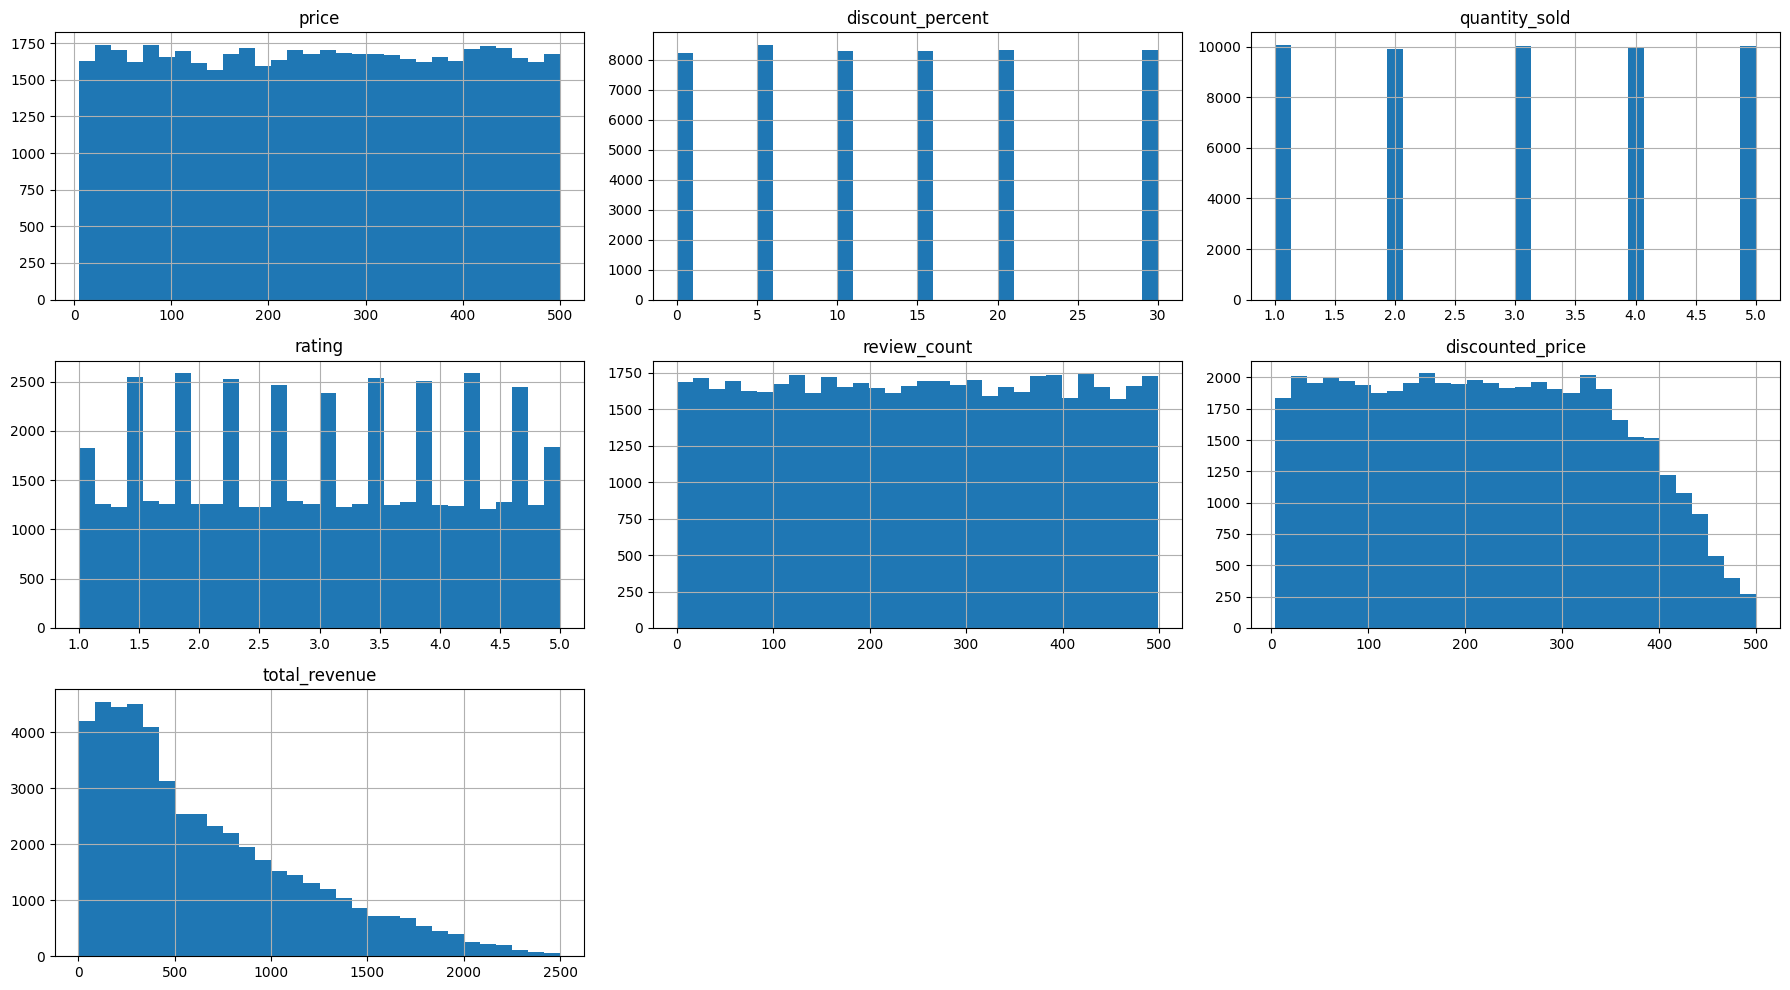

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

Numerical_Features = ['price', 'discount_percent','quantity_sold',
                      'rating', 'review_count', 'discounted_price',
                      'total_revenue']


data[Numerical_Features].hist(figsize=(18,10), bins=30)
plt.tight_layout()
plt.show()

Total Values in the product_category column: product_category
Beauty            8465
Fashion           8365
Books             8327
Electronics       8320
Sports            8265
Home & Kitchen    8258
Name: count, dtype: int64


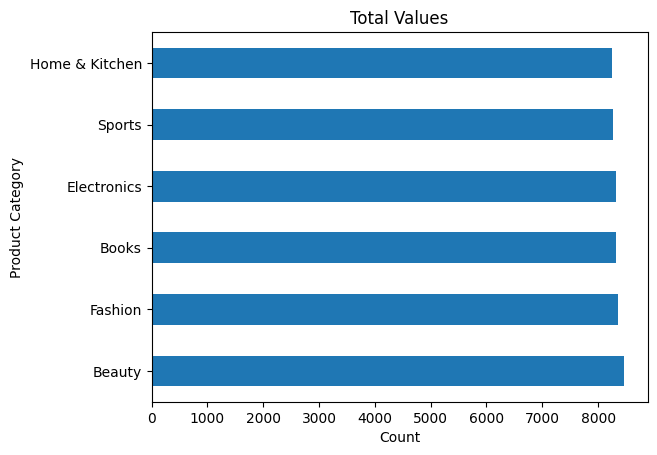

In [37]:
Product_Category = data['product_category'].value_counts()
print("Total Values in the product_category column:", Product_Category)


plt.figure()
Product_Category.plot(kind='barh')
plt.title('Total Values')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

In [ ]:
Numerical_Features = ['customer_region', '']

Total Values in the customer_region column: customer_region
Asia             12526
North America    12517
Middle East      12505
Europe           12452
Name: count, dtype: int64


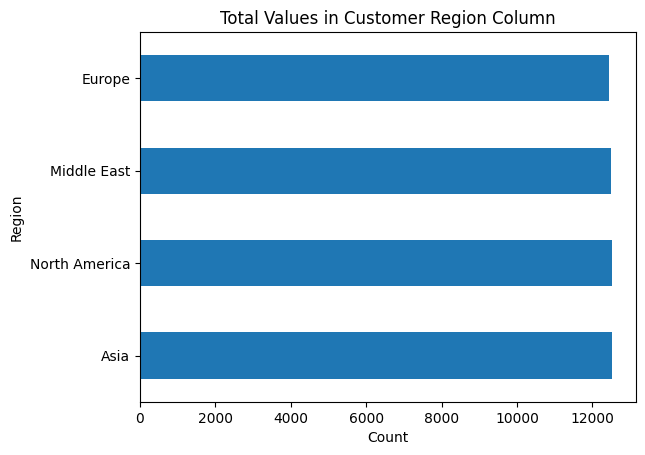

In [42]:
Customer_Region = data['customer_region'].value_counts()
print("Total Values in the customer_region column:", Customer_Region)

plt.show()
Customer_Region.plot(kind='barh')
plt.title("Total Values in Customer Region Column")
plt.xlabel("Count")
plt.ylabel("Region")
plt.show()

Total Values in payment_method Column: payment_method
Wallet              10106
UPI                 10078
Debit Card           9981
Cash on Delivery     9927
Credit Card          9908
Name: count, dtype: int64


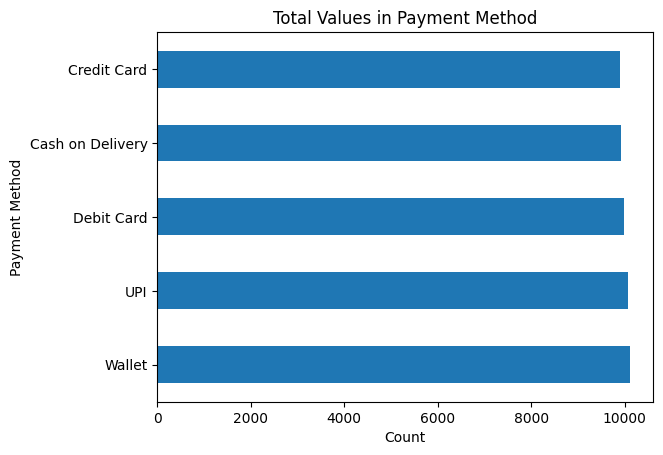

In [44]:
Payment_Method = data['payment_method'].value_counts()
print("Total Values in payment_method Column:", Payment_Method)

plt.figure()
Payment_Method.plot(kind='barh')
plt.title("Total Values in Payment Method")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()